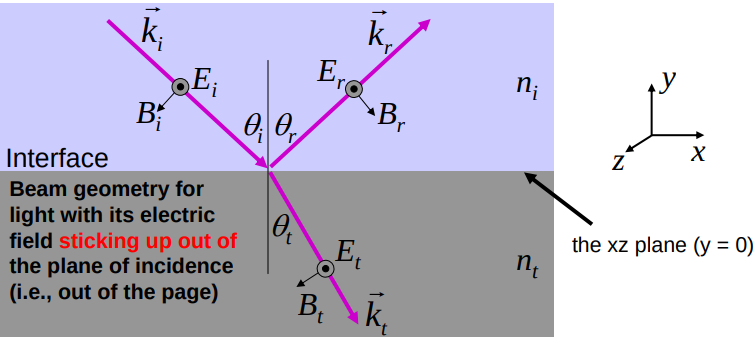
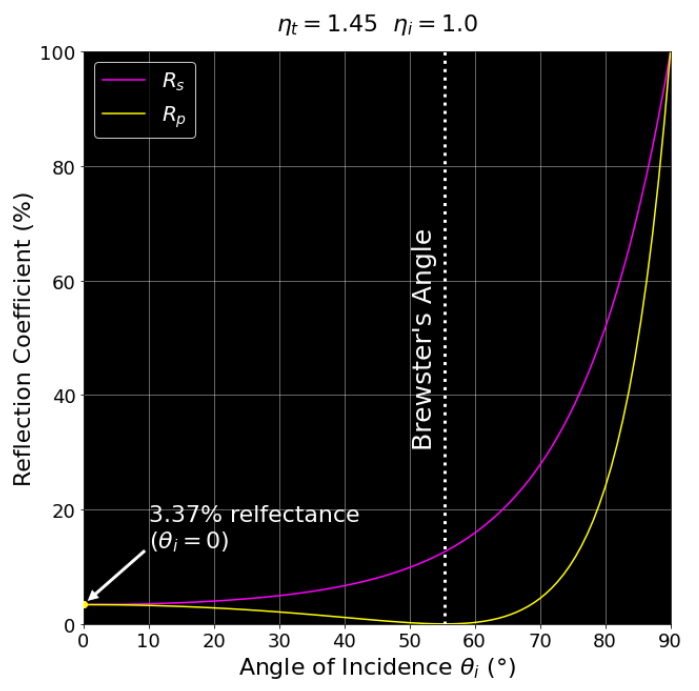

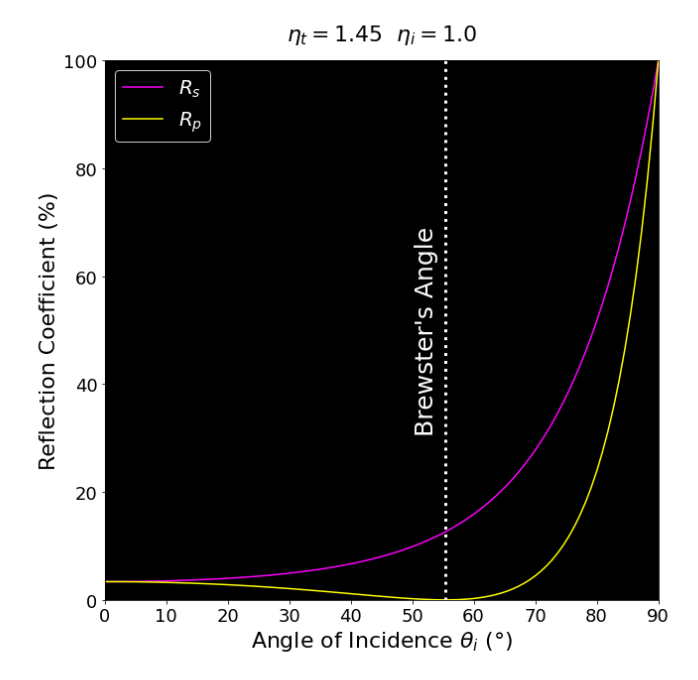
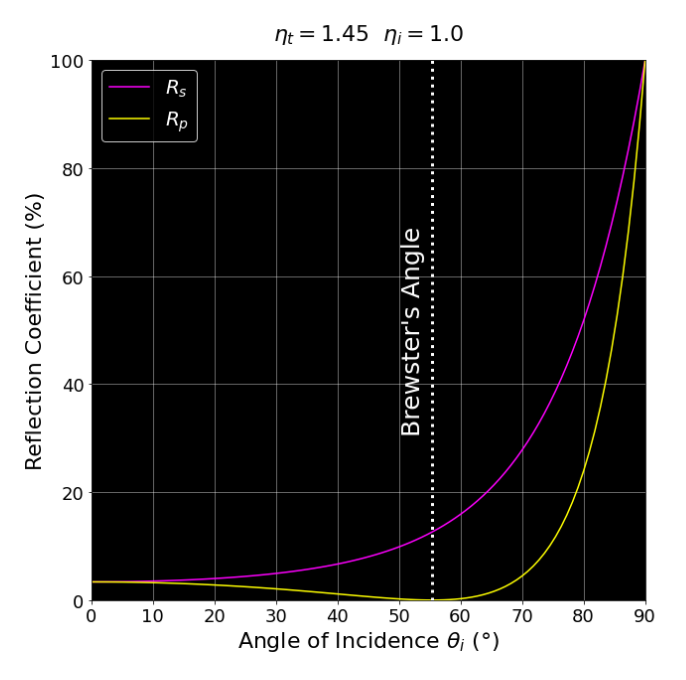
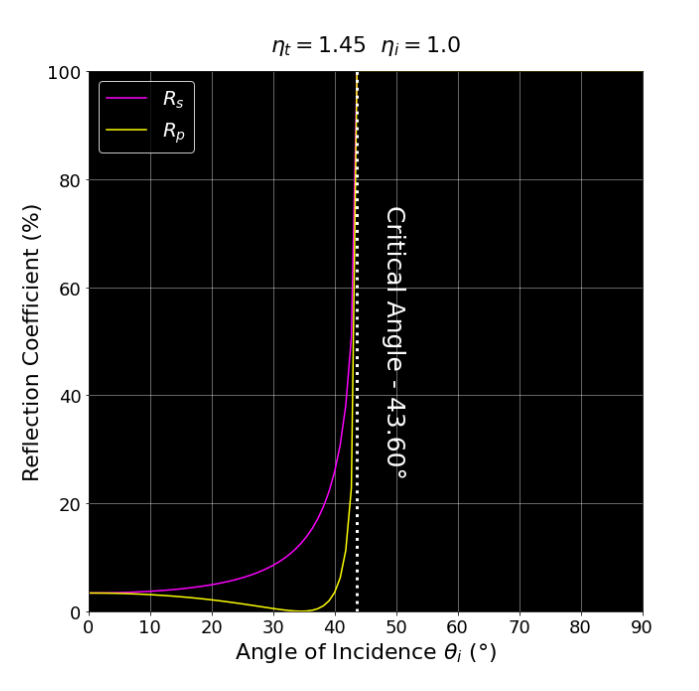
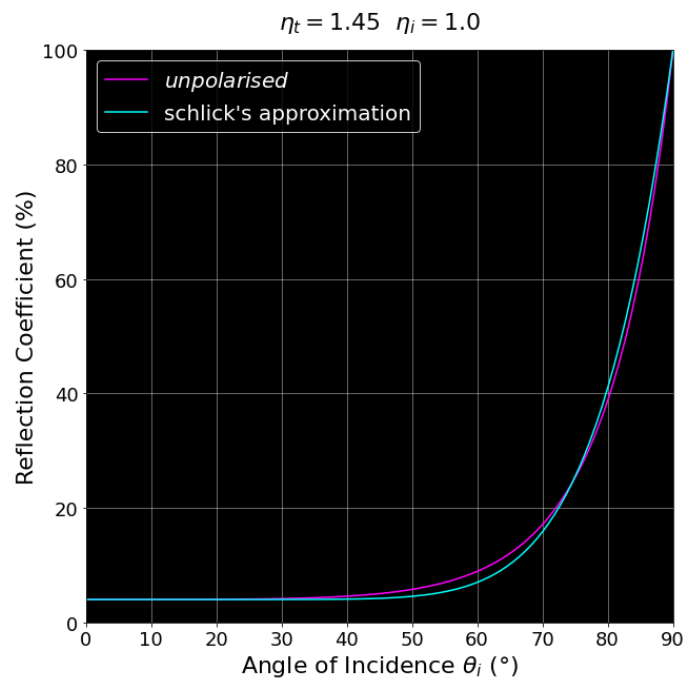

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

def to_radians(degrees):
	return degrees * (np.pi / 180)

def to_degrees(radians):
	return radians * (180 / np.pi)

def fresnel_reflectance(n_t, n_i, theta_i):
	# Calculate the reflection coefficient using the Fresnel equations
	# You can implement the equations here

	theta_i = to_radians(theta_i)

	theta_t = np.arcsin((n_i * np.sin(theta_i)) / n_t)

	r_s = (n_t * np.cos(theta_i) - n_i * np.cos(theta_t)) / (n_t * np.cos(theta_i) + n_i * np.cos(theta_t))
	r_p = (n_t * np.cos(theta_t) - n_i * np.cos(theta_i)) / (n_t * np.cos(theta_t) + n_i * np.cos(theta_i))

	# r_s[np.isnan(r_s)] = 1
	# r_p[np.isnan(r_p)] = 1
	# print(r_s, r_p)

	return (r_s * r_s, r_p * r_p)


def schlick_approximation(n_t, n_i, theta_i):
    srR_0 = (n_i - n_t) / (n_i + n_t)
    r_0 = srR_0 * srR_0
    theta_i = to_radians(theta_i)
    r0 = r_0 + (1-r_0) * np.power(1 - np.cos(theta_i), 5)
    # print(r0)
    return r0

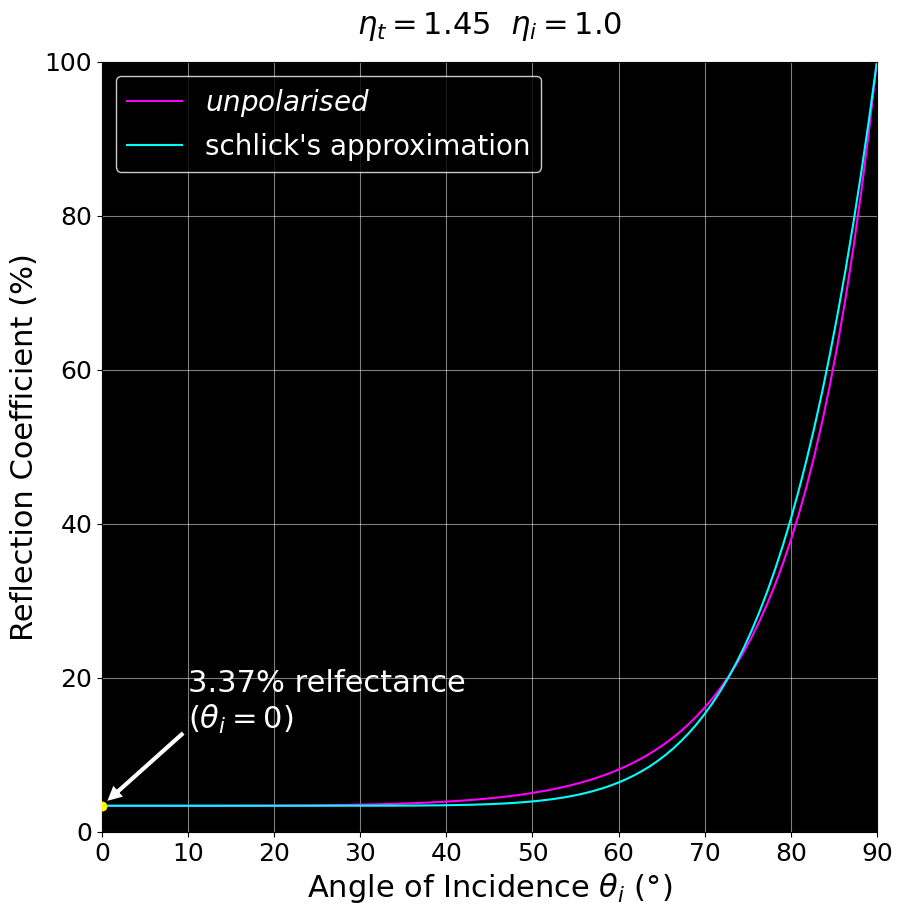

In [8]:


# Define the refractive index of the dielectric material
n_i = 1.0
n_t = 1.45

# Define the incident angles ranging from 0 to 90 degrees
theta = np.linspace(0, 90, 100)

# # Calculate the reflection coefficient for each incident angle
r_par, r_ort = fresnel_reflectance(n_t, n_i, theta)
r_par_sh = schlick_approximation(n_t, n_i, theta)

r_par_0, r_ort_0 = fresnel_reflectance(n_t, n_i, 0)
r_par_sh0 = schlick_approximation(n_t, n_i, 0)


plt.figure(figsize=(10, 10))

# Add a mark for where the curves are at 0 incidence
plt.scatter(0, r_ort_0 * 100, color='magenta', zorder=5)
plt.scatter(0, r_par_0 * 100, color='yellow', zorder=5)

# plt.scatter(0, r_par_sh0 * 100, color='cyan', zorder=5)

# # Add text to indicate the reflectance coefficient at 0 incidence
plt.text(10, r_ort_0 * 100 + 10, f'{r_ort_0 * 100:.2f}% relfectance \n' r'($\theta_i = 0 $)', color='white', ha='left', fontsize=22)
plt.annotate('', xy=(0, r_ort_0 * 100), xytext=(10, r_ort_0 * 100 + 10),
             arrowprops=dict(facecolor='white', shrink=0.05))

# Plot the Fresnel reflectance
plt.plot(theta, ((r_ort + r_par) / 2) * 100, color='magenta', label=r'$unpolarised$')

# plt.plot(theta, r_ort * 100, color='magenta', label=r'$R_s$')
# plt.plot(theta, r_par * 100, color='yellow', label=r'$R_p$')
plt.plot(theta, r_par_sh * 100, color='cyan', label='schlick\'s approximation' )

plt.legend(loc='upper left', fontsize=20, facecolor='black', edgecolor='white', labelcolor='white')

plt.xlabel(r'Angle of Incidence $\theta_i$ ' + '($\u00b0$)', fontsize=22)
plt.ylabel('Reflection Coefficient (%)', fontsize=22)

plt.title(r'$\eta_t = 1.45$  $\eta_i = 1.0$', fontsize=22, pad=20)
plt.grid(True, color='white', alpha=.5)
plt.gca().set_facecolor('black')

plt.tick_params(axis='both', which='major', labelsize=18)
# theta_b = to_degrees(math.atan(n_t/n_i))
# plt.axvline(x=theta_b, color='white', linestyle='dotted', linewidth=3)

# # Add a horizontal label to Brewster's angle
# plt.text(theta_b - 5, 50, 'Brewster\'s Angle', rotation=90, verticalalignment='center', color='white', fontsize=25)

# theta_c = np.arcsin(n_t / n_i) * 180 / np.pi

# Add a vertical dotted line marking the critical angle
# plt.axvline(x=theta_c, color='white', linestyle='dotted', linewidth=3)

# plt.annotate('', xy=(90, 10), xytext=(theta_c, 10), arrowprops=dict(arrowstyle='<->', color='white'))
# plt.text((90 + theta_c) / 2, 12, 'Range of Total Internal Reflection', color='white', ha='center', fontsize=15)


# Add a label to the critical angle
# plt.text(theta_c + 4, 50, f'Critical Angle - {theta_c:.2f}\u00b0', rotation=-90, verticalalignment='center', color='white', fontsize=25)


# Set the y-axis limits and ticks
plt.xlim(0, 90)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 91, 10))

plt.savefig('schlick.png', dpi=300, bbox_inches='tight')
plt.show()
